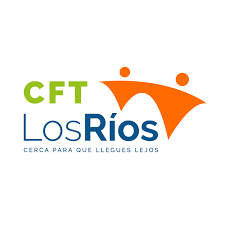
## Curso: Aprendizaje Supervisado
## Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

data = pd.read_csv('student.csv')

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
X = data.drop('GradeClass', axis=1) 
y = data['GradeClass']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Crear el modelo de Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)


In [6]:
# Ajustar el modelo a los datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Realizar predicciones con los datos de prueba
y_pred = random_forest.predict(X_test)

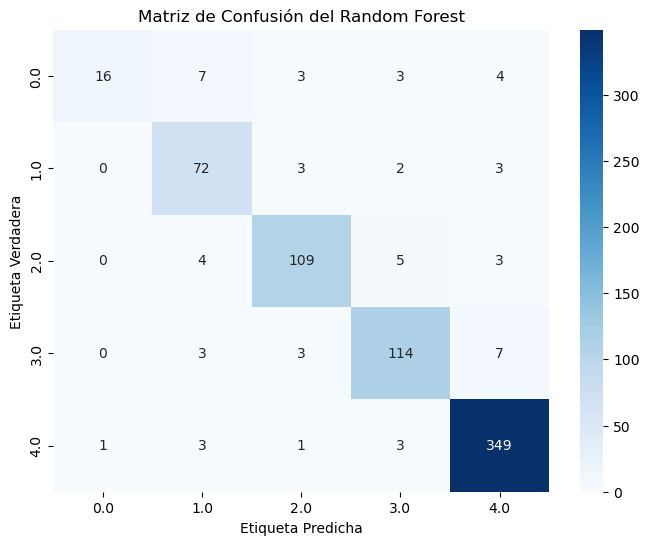

In [8]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión del Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.48      0.64        33
         1.0       0.81      0.90      0.85        80
         2.0       0.92      0.90      0.91       121
         3.0       0.90      0.90      0.90       127
         4.0       0.95      0.98      0.97       357

    accuracy                           0.92       718
   macro avg       0.90      0.83      0.85       718
weighted avg       0.92      0.92      0.92       718



In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
# Crear el modelo base de Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a ajustar en el Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],               # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],               # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],               # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],                 # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]                     # Si se utiliza o no el muestreo Bootstrap
}

# Configurar GridSearchCV para ajustar los hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


In [13]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [14]:
# Utilizar el mejor modelo encontrado por GridSearchCV
best_rf = grid_search.best_estimator_

# Realizar predicciones con los datos de prueba
y_pred_grid = best_rf.predict(X_test)

In [15]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_grid)

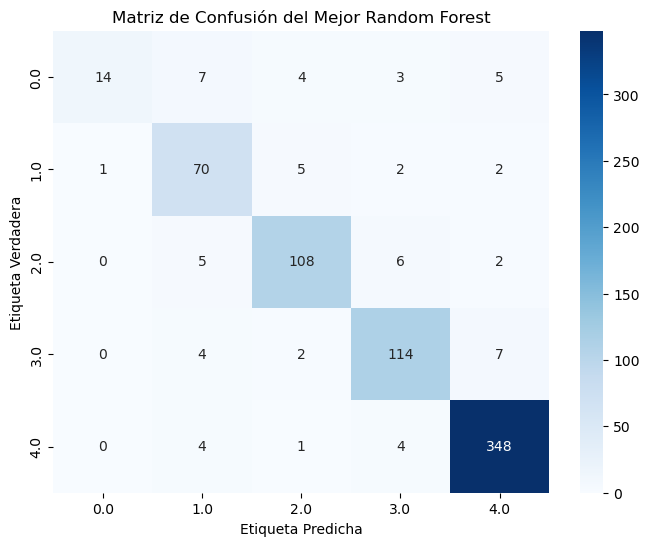

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión del Mejor Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [17]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

         0.0       0.93      0.42      0.58        33
         1.0       0.78      0.88      0.82        80
         2.0       0.90      0.89      0.90       121
         3.0       0.88      0.90      0.89       127
         4.0       0.96      0.97      0.97       357

    accuracy                           0.91       718
   macro avg       0.89      0.81      0.83       718
weighted avg       0.91      0.91      0.91       718

